## Exploratory data analysis
### 1. Introduction
**Dataset Source:**

This dataset contains historical logistics and shipment records, including purchase orders, delivery dates, shipment modes, freight costs, and weights.  
The data has been cleaned and standardized in the previous notebook (`01_data_cleaning.ipynb`) and represents finalized shipment-level observations.

**Purpose of Exploratory Data Analysis:**

The purpose of this exploratory data analysis is to:
- Understand the overall structure and distribution of logistics records
- Identify key patterns in shipment volume, delivery timelines, and freight costs
- Highlight potential data quality issues that may impact downstream analysis
- Establish a solid foundation for performance evaluation and KPI analysis in subsequent steps


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/cleaned_supply_chain_data.csv")
df.head()

,id,project_code,pq_#,po___so_#,asn_dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,invalid_delivery,weight_kg,freight_cost_usd,inconsistency_check,lead_time_days,schedule_delay_days,on_time,freight_per_kg,delivered_month,delivered_year
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte D'Ivoire,PMO - US,Direct Drop,EXW,Air,...,False,13.0,780.34,False,NaN,0,True,60.026154,2006-06,2006
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,False,358.0,4521.50,False,NaN,0,True,12.629888,2006-11,2006
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte D'Ivoire,PMO - US,Direct Drop,FCA,Air,...,False,171.0,1653.78,False,NaN,0,True,9.671228,2006-08,2006
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,False,1855.0,16007.06,False,NaN,0,True,8.629143,2006-09,2006
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,False,7590.0,45450.08,False,NaN,0,True,5.988153,2006-08,2006


### 2. Overall Dataset Overview

#### 2.1 Distribution of Records by Year

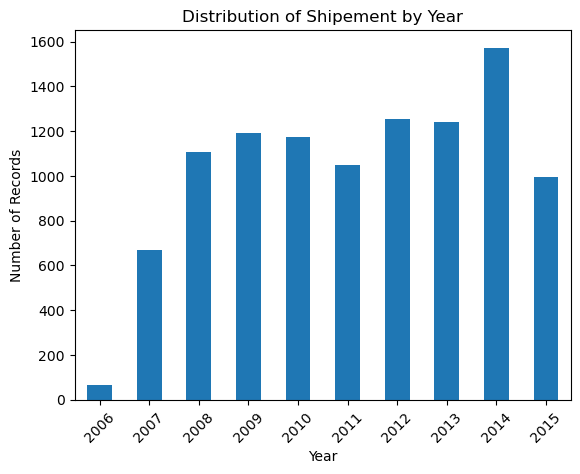

In [19]:
df["delivered_year"].value_counts().sort_index().plot(kind = "bar")
plt.title("Distribution of Shipement by Year")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Number of Records")
plt.show()

**Observation:**  

Shipment records increase steadily from 2006 to 2014, peaking in 2014 with the highest number of deliveries. In 2015, the volume decreases compared to the previous year.

**Insight:** 

The upward trend from 2006 to 2014 suggests a period of operational expansion.

The decline in 2015 does not necessarily indicate reduced operations; it may reflect partial-year data or changes in reporting practices.

#### 2.2 Shipment Mode Breakdown

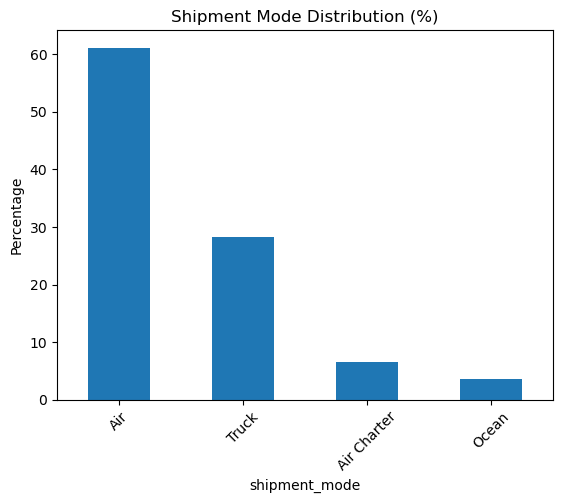

In [20]:
((df["shipment_mode"].value_counts()/100).round(1)).plot(kind = "bar")
plt.title("Shipment Mode Distribution (%)")
plt.ylabel("Percentage")
plt.xticks(rotation = 45)
plt.show()

**Observation:**  

Air transport accounts for the majority of shipments, followed by truck deliveries. Air Charter and Ocean shipments represent only a small portion of total volume.

**Insight:** 

The heavy reliance on air transport indicates that shipments are time-sensitive and operationally critical, where delivery speed outweighs cost considerations.

Truck shipments are likely used for domestic or last-mile distribution, while ocean freight is minimally utilized due to long transit times and infrastructure constraints in destination regions.

#### 2.3 Country / Region Overview

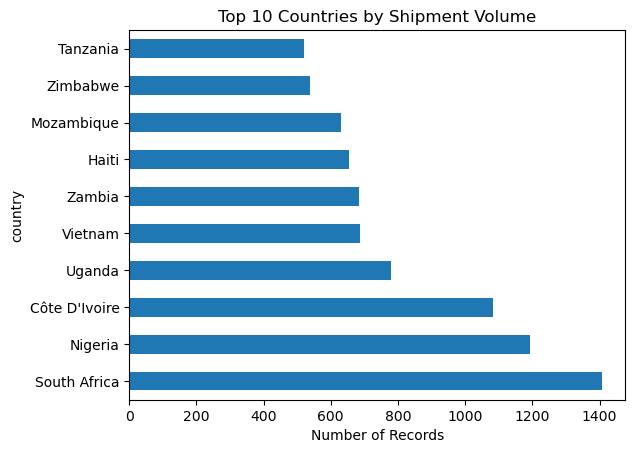

In [21]:
df["country"].value_counts().sort_values(ascending = False).head(10).plot(kind = "barh")
plt.title("Top 10 Countries by Shipment Volume")
plt.xlabel("Number of Records")
plt.show()

**Observation:**  

Shipment volume is concentrated in a limited number of countries, with South Africa, Nigeria, and Côte d’Ivoire leading in total records. Most top destinations are located in Sub-Saharan Africa and Asian countries.

**Insight:** 

South Africa and Nigeria likely function as regional logistics hubs, supporting both local demand and cross-border distribution.

The geographic concentration reflects sustained program activity, long-term projects, and high demands in regions with ongoing supply and delivery needs.

### 3. Delivery Performance Analysis

#### 3.1 Lead Time Distribution

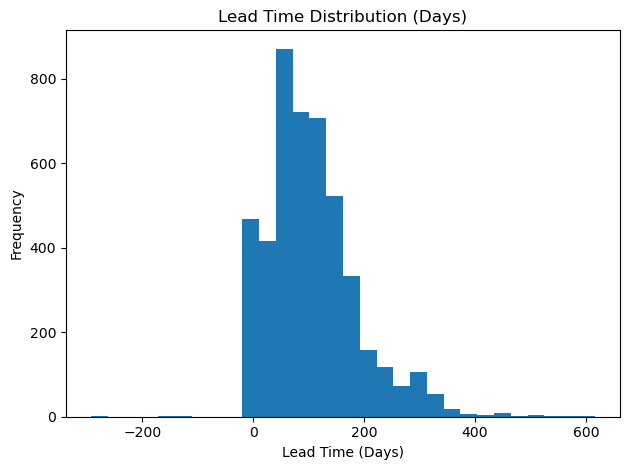

In [22]:
df["lead_time_days"].dropna().plot(kind = "hist", bins = 30)
plt.title("Lead Time Distribution (Days)")
plt.xlabel("Lead Time (Days)")
plt.tight_layout()
plt.show()

**Observation:**  

Lead time shows a right-skewed distribution, with most shipments delivered within approximately 50 to 150 days. A small number of records display extremely high or negative lead times.

**Insight:** 

Longer lead times are consistent with complex international procurement processes involving multiple approval and transportation stages.

Negative or extreme values indicate data quality issues rather than real operational outcomes.


#### 3.2 On-time vs Delayed Deliveries

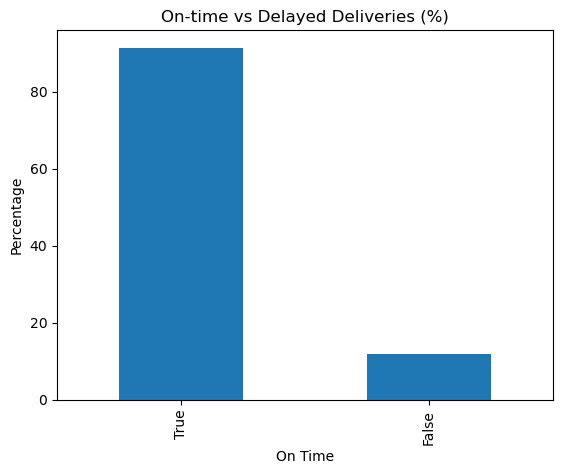

on_time
True     91.4
False    11.9
Name: count, dtype: float64

In [23]:
((df["on_time"].value_counts()/100).round(1)).plot(kind = "bar")
plt.title("On-time vs Delayed Deliveries (%)")
plt.ylabel("Percentage")
plt.xlabel("On Time")
plt.show()
(df["on_time"].value_counts()/100).round(1)

**Observation:**  

The majority of shipments are recorded as on-time 91.4%, with delayed deliveries representing a relatively small share 11.9%.

**Insight:** 

The high on-time rate suggests strong delivery execution for mission-critical shipments. However, this metric may be influenced by missing or incomplete scheduling data in some records.

#### 3.3 Invalid Delivery Cases

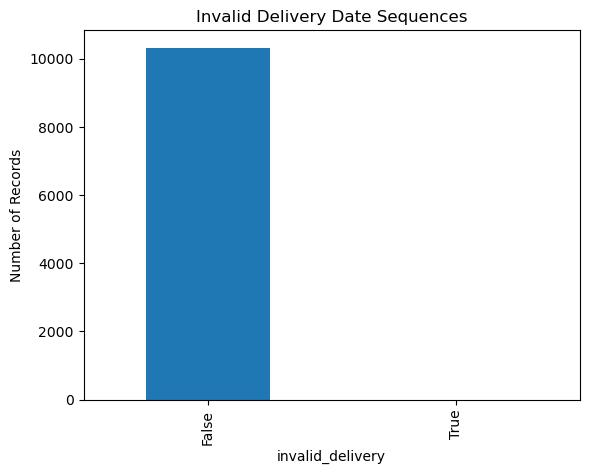

invalid_delivery
False    10319
True         5
Name: count, dtype: int64

In [24]:
df["invalid_delivery"].value_counts().plot(kind = "bar")
plt.title("Invalid Delivery Date Sequences")
plt.ylabel("Number of Records")
plt.show()
df["invalid_delivery"].value_counts()

**Observation:**  

Only a very small number of shipments are flagged as invalid deliveries.

**Insight:** 

These cases are most likely caused by incorrect or inconsistent date entries rather than actual delivery failures.

### 4. Freight & Cost Analysis

#### 4.1 Freight Cost Distribution

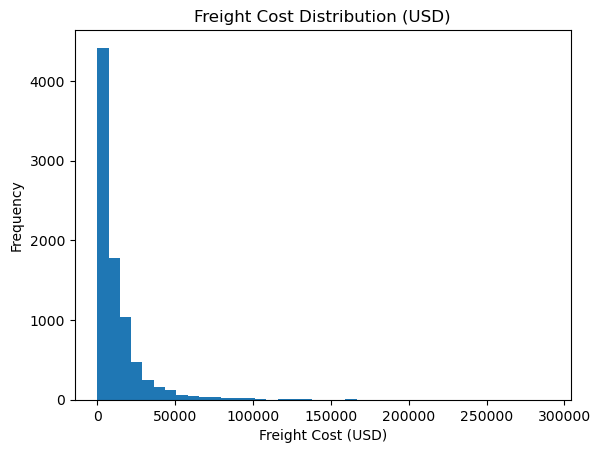

In [25]:
df["freight_cost_usd"].dropna().plot(kind = "hist", bins = 40)
plt.title("Freight Cost Distribution (USD)")
plt.xlabel("Freight Cost (USD)")
plt.show()

**Observation:**  

Freight costs are highly right-skewed, with most shipments incurring relatively low costs and a small number of shipments showing extremely high values.

**Insight:** 

High-cost shipments are typically associated with urgent air transport, low shipment weight, and emergency deliveries.

#### 4.2 Freight Cost per Kg Distribution

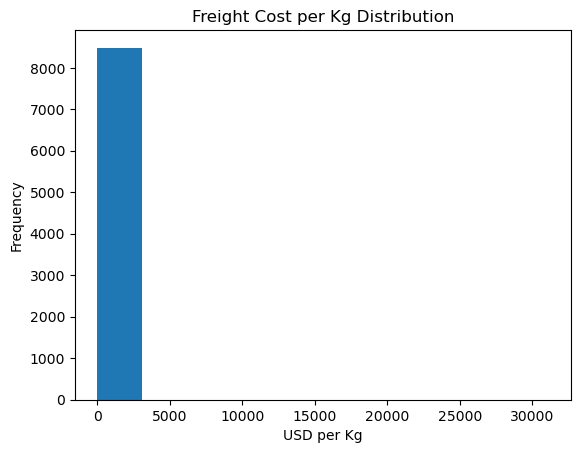

In [26]:
df["freight_per_kg"].dropna().plot(kind = "hist", bins = 10)
plt.title("Freight Cost per Kg Distribution")
plt.xlabel("USD per Kg")
plt.show()

#### 4.3 Freight Cost by Shipment Mode

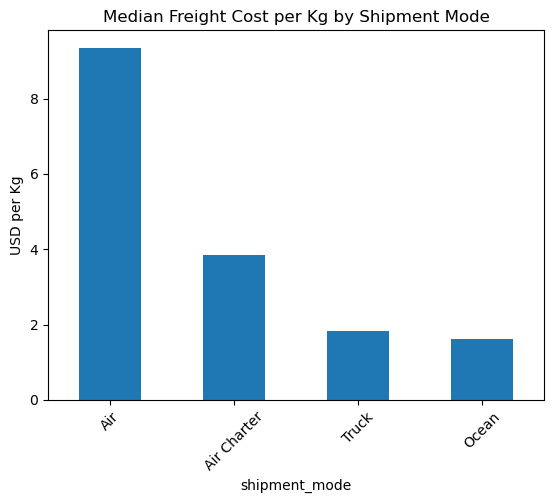

shipment_mode
Air            9.346775
Air Charter    3.852769
Truck          1.822779
Ocean          1.620668
Name: freight_per_kg, dtype: float64

In [27]:
df.groupby("shipment_mode")["freight_per_kg"].median().sort_values(ascending = False).plot(kind = "bar")
plt.title("Median Freight Cost per Kg by Shipment Mode")
plt.ylabel("USD per Kg")
plt.xticks(rotation = 45)
plt.show()
df.groupby("shipment_mode")["freight_per_kg"].median().sort_values(ascending = False)

**Observation:** 

Air shipments have the highest median freight cost per kilogram, while truck and ocean shipments are significantly more cost-efficient. Air Charter shipments show lower median cost per kilogram than standard air shipments.

**Insight:** 

Air Charter can be more cost-effective for larger consolidated shipments, despite being used for time-sensitive deliveries.
Truck and ocean modes offer strong cost advantages when delivery timelines allow.

### 5. Data Quality Insights

#### 5.1 Missing Data Patterns

In [28]:
(df.isna().mean()/100).round(1).sort_values(ascending = False).head(10)

id                                  0.0
pq_first_sent_to_client_date_raw    0.0
line_item_quantity                  0.0
line_item_value                     0.0
pack_price                          0.0
unit_price                          0.0
manufacturing_site                  0.0
first_line_designation              0.0
line_item_insurance_(usd)           0.0
po_sent_to_vendor_date_raw          0.0
dtype: float64

**Observation:** 

No missing values are observed across the key analytical fields in this dataset, including shipment dates, shipment mode, country, weight, and freight cost.

**Insight:**

The absence of missing values indicates that the dataset has already undergone a certain level of preprocessing or consolidation before publication. This improves reliability for downstream analysis and KPI calculation.

#### 5.2 Inconsistencies

inconsistency_check
False    10278
True        46
Name: count, dtype: int64

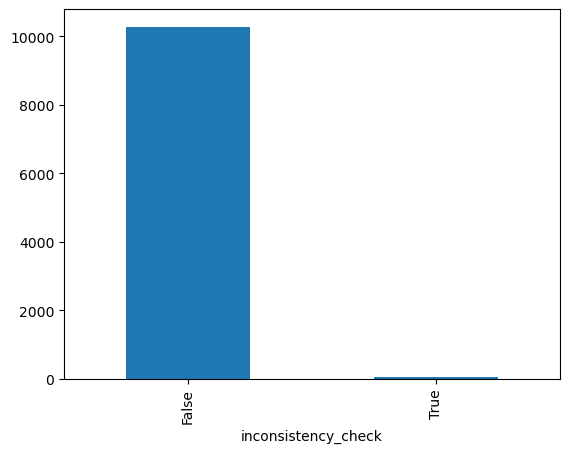

In [29]:
df["inconsistency_check"].value_counts().plot(kind = "bar")
df["inconsistency_check"].value_counts()

**Observation:**  

A small number of records show inconsistencies between shipment weight and freight cost.

**Insight:** 

These inconsistencies likely result from partial data capture or financial records being logged separately from physical shipment details.

#### 5.3 Business Interpretation
Missing values and inconsistencies in this dataset primarily reflect real operational processes rather than systemic data issues. Early-stage procurement records often lack finalized shipment details, while some financial information is recorded independently from shipment measurements. Data quality flags are therefore retained to support transparent and informed interpretation during performance analysis.

### 6. Key Findings & Insights

- Shipment volume increased steadily from 2006 to 2014, indicating a period of operational expansion, before declining slightly in 2015.
- Air transport dominates the logistics network, highlighting the time-sensitive and critical nature of the shipments.
- Shipments are geographically concentrated in Sub-Saharan Africa, with South Africa and Nigeria serving as major logistics hubs.
- Lead time distribution is right-skewed, with most deliveries completed within 30–150 days, while extreme values point to data quality limitations.
- Over 90% of shipments are recorded as on-time, reflecting strong delivery execution, though this metric should be interpreted alongside missing and inconsistent data.
- Freight costs vary widely, and cost per kilogram provides a more reliable basis for performance comparison than absolute cost.
- Shipment mode is the primary driver of freight cost differences, with air transport being the most expensive and truck and ocean modes offering cost-efficient alternatives when timing allows.
- Data quality issues observed in the dataset are largely driven by procurement lifecycle stages rather than operational failure.